--- Original Data Structure ---
   feature_1  feature_2  feature_3      color
0  -3.121175   3.887792   7.628535   8.242346
1   6.125104  11.379920  12.223941  13.672660
2   6.705811  18.331863  -9.479118  11.611269
3  -6.191714  15.376723  -8.299438  10.354612
4   6.151722  16.937784  -0.619439   6.182830


--- Data Type Verification ---
feature_1    float64
feature_2    float64
feature_3    float64
color        float64
dtype: object
Result: All features are floating-point numbers, which is suitable for Isomap.


--- Visualizing the 3D Manifold ---


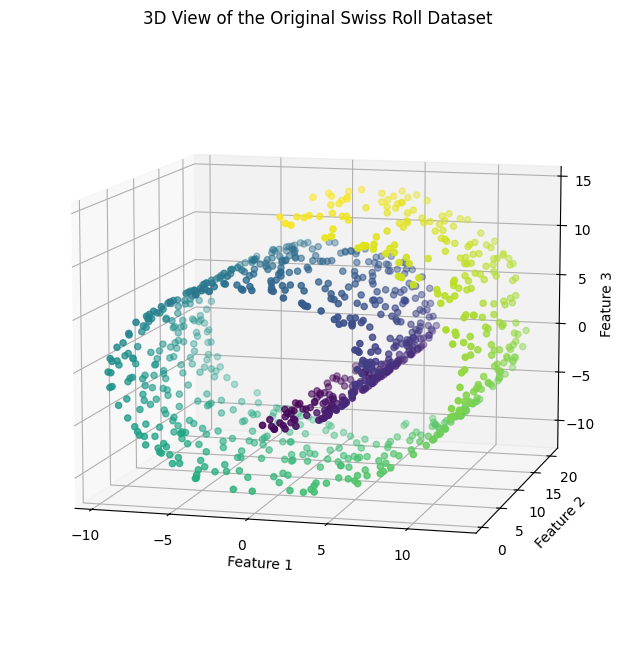

Result: The plot shows a clear, continuous 'roll'. This confirms that the dataset
is a good candidate for a manifold learning algorithm like Isomap, which aims to 'unroll' it.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

# --- 1. Load a Relevant Sample Dataset ---
# Isomap is designed for non-linear data that lies on a continuous manifold.
# The "Swiss roll" dataset is a perfect example.
# We generate 1000 data points in a 3D space that form a rolled-up shape.
X, color = make_swiss_roll(n_samples=1000, random_state=42)

# Convert the NumPy array to a pandas DataFrame for easier handling.
# The 'color' variable from make_swiss_roll represents the position along the unrolled manifold,
# which is useful for visualizing the result later.
df = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3'])
df['color'] = color

print("--- Original Data Structure ---")
print(df.head())
print("\n")


# --- 2. Data Type Check ---
# Constraint: Isomap, like other distance-based algorithms, requires all input features to be numerical.
# Test: We check the data types (dtypes) of our DataFrame to ensure they are numeric.
print("--- Data Type Verification ---")
print(df.dtypes)
print("Result: All features are floating-point numbers, which is suitable for Isomap.")
print("\n")


# --- 3. Manifold Assumption Check (Visual) ---
# Constraint: Isomap assumes the data forms a single, connected manifold. If the data is composed
# of multiple, far-apart clusters, Isomap may fail to connect them.
# Test: A 3D scatter plot helps us visually verify this assumption. We expect to see a
# continuous, rolled-up sheet of points, not disjoint clouds.

print("--- Visualizing the 3D Manifold ---")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['feature_1'], df['feature_2'], df['feature_3'], c=df['color'], cmap=plt.cm.viridis)
ax.set_title("3D View of the Original Swiss Roll Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.view_init(elev=10, azim=-75) # Adjust viewing angle for better visualization
plt.show()

print("Result: The plot shows a clear, continuous 'roll'. This confirms that the dataset")
print("is a good candidate for a manifold learning algorithm like Isomap, which aims to 'unroll' it.")

